In [ ]:
from collections import defaultdict
from google.colab import files
import matplotlib.pyplot as plt, numpy as np, pandas as pd

# Q1
### a)

Since the number of distinct $k$-mers is $260569$, the genome size is around $260$ to $261$ kilobases. This is not consistent with the estimate of $30$ kilobases from pulsed field gel electrophoresis.

In [ ]:
_ = files.upload()
readsA = []
with open('readsA.txt', 'r') as f:
  for i, line in enumerate(f):
    if (i - 1) % 4 == 0: readsA.append(line[:-1])

complements = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
kmers = {}
k = 17

for read in readsA:
  for i in range(len(read) - k + 1):
    forward = read[i:i + k]
    reverse = forward[::-1]
    reverse = ''.join([complements[x] for x in reverse])
    kmer = min(forward, reverse)
    if hash(kmer) not in kmers: kmers[hash(kmer)] = 1
    else: kmers[hash(kmer)] += 1

print(len(kmers))

260569


### b)

The plot shows a large peak on the left end of the distribution which indicates that there are many $k$-mers which only appear a few times in the data, thus distorting the previous estimate. To resolve this, $k$-mers which appear $2$ or fewer times are removed so that the maximum of the distribution occurs in the center of the main curve. The new genome size estimate is $30409$, which is consistent with the estimate of $30$ kilobases from pulsed field gel electrophoresis.

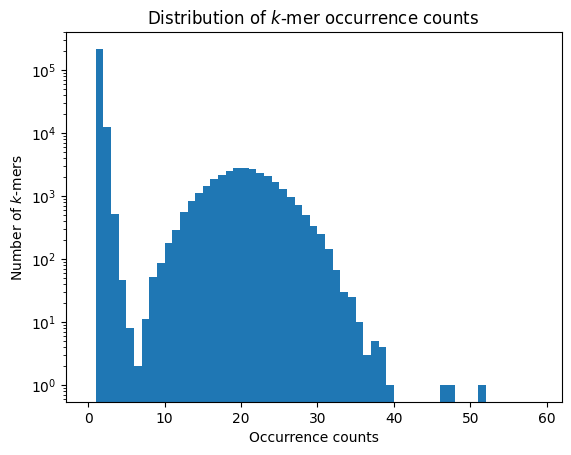

In [ ]:
plt.hist(kmers.values(), bins = range(60))
plt.title(r'Distribution of $k$-mer occurrence counts')
plt.xlabel('Occurrence counts'); plt.ylabel(r'Number of $k$-mers')
plt.yscale('log')

30409


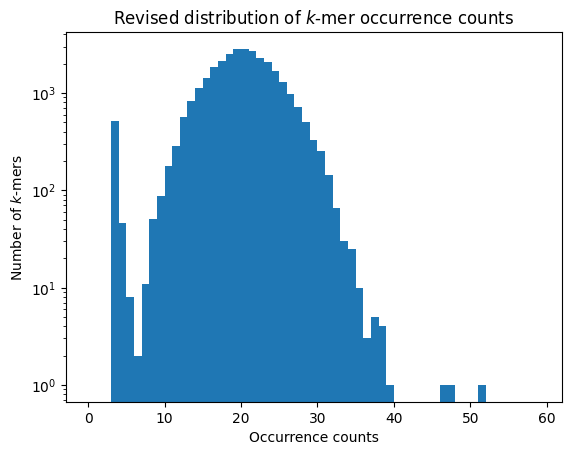

In [ ]:
kmers = {k: v for k, v in kmers.items() if v > 2}
print(len(kmers))

plt.hist(kmers.values(), bins = range(60))
plt.title(r'Revised distribution of $k$-mer occurrence counts')
plt.xlabel('Occurrence counts'); plt.ylabel(r'Number of $k$-mers')
plt.yscale('log')

### c)

$24$ $k$-mers have ambiguous extensions.

In [ ]:
_ = files.upload()
readsB = []
with open('readsB.txt', 'r') as f:
  for i, line in enumerate(f):
    if (i - 1) % 4 == 0: readsB.append(line[:-1])

# def ambig(reads, k):
#   kmers, graph, count = set(), defaultdict(lambda: {'in': [], 'out': []}), 0
#   for read in reads:
#     for i in range(len(read) - k + 1): kmers.add(read[i:i + k])
#   for kmer in kmers: graph[kmer[:-1]]['out'].append(kmer); graph[kmer[1:]]['in'].append(kmer)
#   for key, value in graph.items():
#     if len(value['in']) > 1 or len(value['out']) > 1: count += 1
#   return count

def ambig(reads, k):
  kmers, p, s, count = set(), defaultdict(set), defaultdict(set), 0
  for read in reads:
    for i in range(len(read) - k + 1): kmers.add(read[i:i + k])
  for kmer in kmers: p[kmer[:-1]].add(kmer); s[kmer[1:]].add(kmer)
  for kmer in kmers:
    if max(len(p.get(kmer[1:], [])), len(s.get(kmer[:-1], []))) > 1: count += 1
  return count

ambig(readsB, 17)

24

# Q2

The transcript fractions or relative coverages of the transcripts at convergence are $0.25$, $0.5$, and $0.25$ for transcripts $1$, $2$, and $3$ respectively.

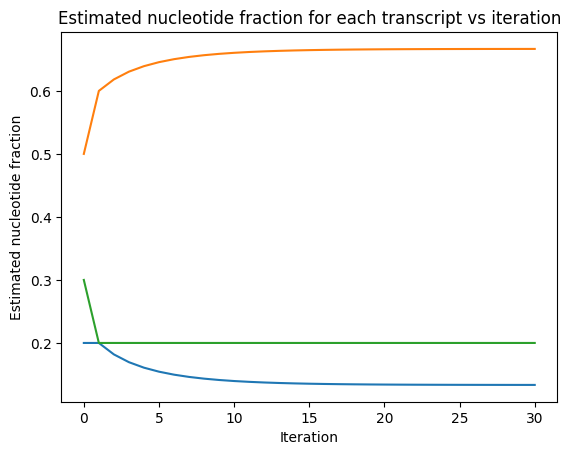

In [ ]:
l = np.array([200, 500, 300])
delta = np.array([[1, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1]])
p = np.array([1 / 3, 1 / 3, 1 / 3])
lst_1, lst_2, n_iter = [(p * l) / np.sum(p * l)], [p], 30

for i in range(n_iter):
  q = np.sum(p * delta / np.dot(delta, p)[:, np.newaxis], axis = 0) / 5
  p = (q / l) / np.sum(q / l)
  lst_1.append(q); lst_2.append(p)

plt.plot(range(n_iter + 1), lst_1)
plt.title('Estimated nucleotide fraction for each transcript vs iteration')
plt.xlabel('Iteration'); plt.ylabel('Estimated nucleotide fraction');

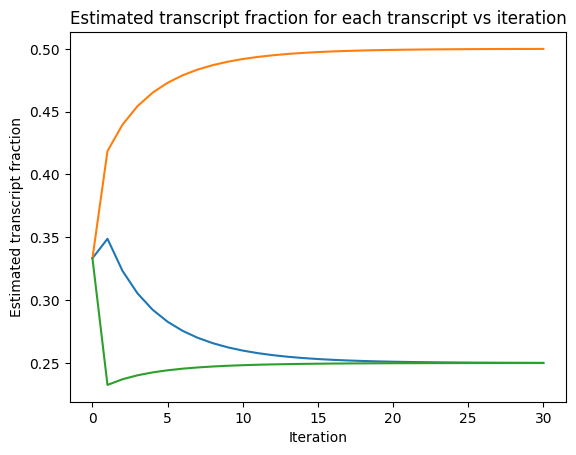

In [ ]:
plt.plot(range(n_iter + 1), lst_2)
plt.title('Estimated transcript fraction for each transcript vs iteration')
plt.xlabel('Iteration'); plt.ylabel('Estimated transcript fraction');